## 자전거 대여량 예측(GRU)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout
from sklearn.model_selection import train_test_split

In [3]:
# 1. 데이터 불러오기
dataset_path = './dataset/'
train_data = pd.read_csv(dataset_path + 'train.csv')
test_data = pd.read_csv(dataset_path + 'test.csv')

In [6]:
# 2. 데이터 전처리
def preprocess_data(data):
    data['datetime'] = pd.to_datetime(data['datetime'])
    data['hour'] = data['datetime'].dt.hour
    data['day'] = data['datetime'].dt.day
    data['month'] = data['datetime'].dt.month
    data['year'] = data['datetime'].dt.year

    data = data.drop(['datetime', 'casual', 'registered'], axis=1, errors='ignore')
    return data

In [7]:
train_data = preprocess_data(train_data)
test_data = preprocess_data(test_data)

In [8]:
# Feature와 target 분리
X = train_data.drop(['count'], axis=1).values
y = train_data['count'].values.reshape(-1, 1)

In [9]:
# MinMaxScaler를 사용하여 데이터 정규화
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

In [10]:
X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y)

In [11]:
# Train/Test 데이터 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# 3. 데이터 차원 조정 (GRU 입력 형태로 변환)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))

In [13]:
# 4. GRU 모델 생성성
model = Sequential([
    GRU(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    GRU(32),
    Dropout(0.2),
    Dense(1)
])

In [14]:
model.compile(optimizer='adam', loss='mse')

In [16]:
# 5. 모델 학습
history = model.fit(
    X_train, y_train, 
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
273/273 [==============================] - 6s 12ms/step - loss: 0.0303 - val_loss: 0.0285
Epoch 2/50
273/273 [==============================] - 3s 10ms/step - loss: 0.0288 - val_loss: 0.0268
Epoch 3/50
273/273 [==============================] - 3s 10ms/step - loss: 0.0271 - val_loss: 0.0244
Epoch 4/50
273/273 [==============================] - 3s 9ms/step - loss: 0.0246 - val_loss: 0.0224
Epoch 5/50
273/273 [==============================] - 3s 10ms/step - loss: 0.0225 - val_loss: 0.0203
Epoch 6/50
273/273 [==============================] - 3s 9ms/step - loss: 0.0204 - val_loss: 0.0183
Epoch 7/50
273/273 [==============================] - 3s 9ms/step - loss: 0.0187 - val_loss: 0.0163
Epoch 8/50
273/273 [==============================] - 3s 9ms/step - loss: 0.0171 - val_loss: 0.0150
Epoch 9/50
273/273 [==============================] - 3s 10ms/step - loss: 0.0160 - val_loss: 0.0153
Epoch 10/50
273/273 [==============================] - 3s 10ms/step - loss: 0.0157 - val_loss: 

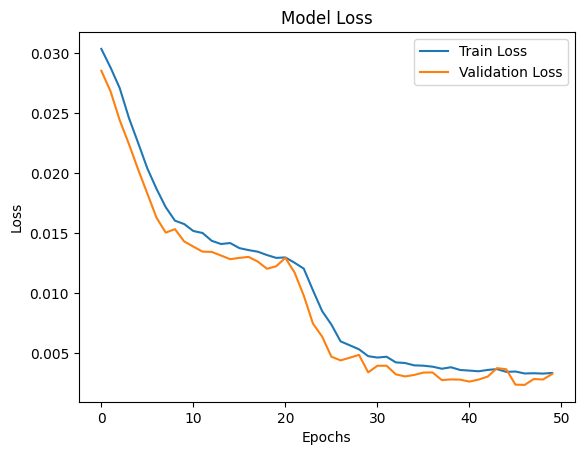

In [17]:
# 6. 학습 과정 시각화
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [18]:
# 7. 테스트 데이터 예측
X_test = scaler_X.transform(test_data.values)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

y_pred = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred)

In [19]:
# 결과 저장
test_data['predicted_count'] = y_pred
test_data.to_csv(dataset_path + 'test_predictions.csv', index=False)
print("예측 결과가 'test_predictions.csv'로 저장되었습니다.")

예측 결과가 'test_predictions.csv'로 저장되었습니다.
